In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Keep in mind every time you run the code, the clusters will change, so the interpretation will change

## Data Preprocessing

In [2]:
df = pd.read_csv('rfm_retail.csv')
df.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Date of Purchase  Unit Price  Customer ID         Country  
0        12  01-12-2009 07:45        6.95      13085.0  United Kingdom  
1        12  01-12-2009 07:45        6.75      13085.0  United Kingdom  
2        12  01-12-2009 07:45        6.75      13085.0  United Kingdom  
3        48  01-12-2009 07:45        2.10      13085.0  United Kingdom  
4        24  01-12-2009 07:45        1.25      13085.0  United Kingdom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        525461 non-null  int64  
 1   Invoice Number    525461 non-null  object 
 2   Item Code         525461 non-null  object 
 3   Item Description  522533 non-null  object 
 4   Quantity          525461 non-null  int64  
 5   Date of Purchase  525461 non-null  object 
 6   Unit Price        525461 non-null  float64
 7   Customer ID       417534 non-null  float64
 8   Country           525461 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 36.1+ MB


In [4]:
regex_pattern = '|'.join(['2009', '2010'])
df[df['Date of Purchase'].str.contains(regex_pattern, regex=True)].shape[0]  # 2009 + 2010 = 525461 = dataframe rows, i.e. no empty values

525461

In [5]:
# Converting the date column to datetime format
df['Date of Purchase_1'] = pd.to_datetime(df['Date of Purchase'], format='%d-%m-%Y %H:%M')
df.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Date of Purchase  Unit Price  Customer ID         Country  \
0        12  01-12-2009 07:45        6.95      13085.0  United Kingdom   
1        12  01-12-2009 07:45        6.75      13085.0  United Kingdom   
2        12  01-12-2009 07:45        6.75      13085.0  United Kingdom   
3        48  01-12-2009 07:45        2.10      13085.0  United Kingdom   
4        24  01-12-2009 07:45        1.25      13085.0  United Kingdom   

   Date of Purchase_1  
0 2009-12-01 07:45:00  
1 2009-12-01 07:45:00  
2 2009-12-01 07:45:00  
3 2009-12-01 07:45:00  
4 2009-12-01 07:45:00

In [6]:
df['Date of Purchase_1'].min(), df['Date of Purchase_1'].max() # Checking the date range and conversion correctness

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [7]:
df['Date of Purchase_1'].min().day

1

In [8]:
df['Date of Purchase_2'] = pd.to_datetime(df['Date of Purchase_1'].dt.date) # Converting the datetime column to date format
df.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Date of Purchase  Unit Price  Customer ID         Country  \
0        12  01-12-2009 07:45        6.95      13085.0  United Kingdom   
1        12  01-12-2009 07:45        6.75      13085.0  United Kingdom   
2        12  01-12-2009 07:45        6.75      13085.0  United Kingdom   
3        48  01-12-2009 07:45        2.10      13085.0  United Kingdom   
4        24  01-12-2009 07:45        1.25      13085.0  United Kingdom   

   Date of Purchase_1 Date of Purchase_2  
0 2009-12-01 07:45:00         2009-12-01  
1 2009-12-01 07:45:00         2009-12-01  
2 2009-12-01 07:45:00         2009-12-01  
3 2009-12-01 07:45:00         2009-12-01  
4 2009-12-01 07:45:00         2009-12-01

In [9]:
df['Date of Purchase_2'].max().day, df['Date of Purchase_2'].min().day #again checking the date range and correctness of conversion

(9, 1)

In [10]:
df.dtypes

Unnamed: 0                     int64
Invoice Number                object
Item Code                     object
Item Description              object
Quantity                       int64
Date of Purchase              object
Unit Price                   float64
Customer ID                  float64
Country                       object
Date of Purchase_1    datetime64[ns]
Date of Purchase_2    datetime64[ns]
dtype: object

In [11]:
df.drop(['Date of Purchase','Date of Purchase_1'], axis=1, inplace=True)
df.rename(columns={'Date of Purchase_2':'purchase_date'}, inplace=True)
df.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Unit Price  Customer ID         Country purchase_date  
0        12        6.95      13085.0  United Kingdom    2009-12-01  
1        12        6.75      13085.0  United Kingdom    2009-12-01  
2        12        6.75      13085.0  United Kingdom    2009-12-01  
3        48        2.10      13085.0  United Kingdom    2009-12-01  
4        24        1.25      13085.0  United Kingdom    2009-12-01

In [12]:
df.tail()

Unnamed: 0 Invoice Number Item Code  \
525456      525456         538171     22271   
525457      525457         538171     22750   
525458      525458         538171     22751   
525459      525459         538171     20970   
525460      525460         538171     21931   

                          Item Description  Quantity  Unit Price  Customer ID  \
525456                FELTCRAFT DOLL ROSIE         2        2.95      17530.0   
525457        FELTCRAFT PRINCESS LOLA DOLL         1        3.75      17530.0   
525458      FELTCRAFT PRINCESS OLIVIA DOLL         1        3.75      17530.0   
525459  PINK FLORAL FELTCRAFT SHOULDER BAG         2        3.75      17530.0   
525460              JUMBO STORAGE BAG SUKI         2        1.95      17530.0   

               Country purchase_date  
525456  United Kingdom    2010-12-09  
525457  United Kingdom    2010-12-09  
525458  United Kingdom    2010-12-09  
525459  United Kingdom    2010-12-09  
525460  United Kingdom    2010-12-09

## Data Cleaning

In [13]:
df.isnull().sum() # we found that there are missing values in CustomerID column which are useless for us

Unnamed: 0               0
Invoice Number           0
Item Code                0
Item Description      2928
Quantity                 0
Unit Price               0
Customer ID         107927
Country                  0
purchase_date            0
dtype: int64

In [14]:
df[(df['Item Description'].isnull()) & (df['Customer ID'].isnull())].shape[0] #checking the number of rows where both CustomerID and Item Description are missing

2928

In [15]:
df[df['Item Description'].isnull()]['Customer ID'].sum() 

0.0

In [16]:
df.dropna(subset=['Customer ID'], inplace=True) #dropping the rows with missing values in CustomerID column
df.isnull().sum()

Unnamed: 0          0
Invoice Number      0
Item Code           0
Item Description    0
Quantity            0
Unit Price          0
Customer ID         0
Country             0
purchase_date       0
dtype: int64

In [17]:
df.shape

(417534, 9)

<AxesSubplot: >

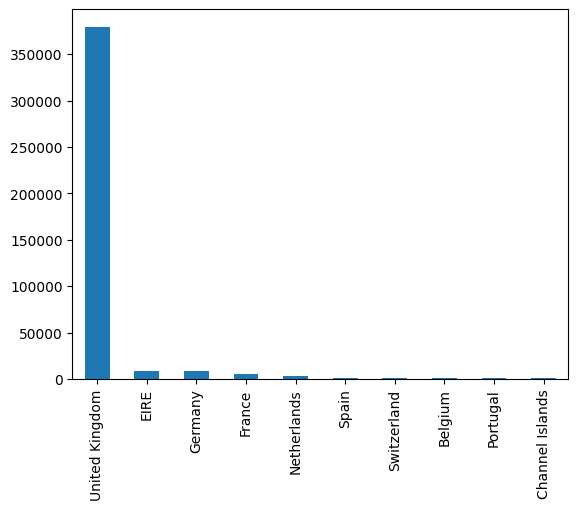

In [18]:
df['Country'].value_counts().head(10).plot.bar() #initial data exploration

In [19]:
(df['Country'].value_counts() / df.shape[0]).head() * 100 #percentage of customers from each country

United Kingdom    90.872360
EIRE               2.086058
Germany            1.946907
France             1.367553
Netherlands        0.663180
Name: Country, dtype: float64

In [20]:
# We can see that most of the customers are from UK, along with that comparable countries are EIRE(Ireland), Germany and France in ecommerce business
# We can also see that there are some customers from other countries as well but those cutomers can be different in nature for clustering purpose

In [21]:
regex_pattern_2 = '|'.join(['United Kingdom', 'EIRE', 'Germany', 'France'])
df2 = df[df['Country'].str.contains(regex_pattern_2, regex=True)]
df2.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Unit Price  Customer ID         Country purchase_date  
0        12        6.95      13085.0  United Kingdom    2009-12-01  
1        12        6.75      13085.0  United Kingdom    2009-12-01  
2        12        6.75      13085.0  United Kingdom    2009-12-01  
3        48        2.10      13085.0  United Kingdom    2009-12-01  
4        24        1.25      13085.0  United Kingdom    2009-12-01

In [22]:
df2['Customer ID'] = df2['Customer ID'].astype('int64') #converting CustomerID column to int64 type
df2.head()

C:\Users\valse\AppData\Local\Temp\ipykernel_10616\3144966554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Customer ID'] = df2['Customer ID'].astype('int64') #converting CustomerID column to int64 type


Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Unit Price  Customer ID         Country purchase_date  
0        12        6.95        13085  United Kingdom    2009-12-01  
1        12        6.75        13085  United Kingdom    2009-12-01  
2        12        6.75        13085  United Kingdom    2009-12-01  
3        48        2.10        13085  United Kingdom    2009-12-01  
4        24        1.25        13085  United Kingdom    2009-12-01

In [23]:
print(df2.shape)
df2[df2['Unit Price'] < 0].shape[0], df2[df2['Unit Price'] == 0].shape[0] #checking the number of rows where Unit Price is 0, these are very less in amount and might also be the promotional items
#These also have the item descriptions

(401972, 9)


(0, 29)

In [24]:
df2[df2['Item Code'].str.contains('TEST')].shape[0], df2[df2['Item Description'] == 'This is a test product.'].shape[0] #checking the number of rows where Item Code and Item Description are 'TEST' and 'This is a test product.' respectively

(16, 16)

In [25]:
df2.drop(df2[df2['Item Code'].str.contains('TEST')].index, inplace=True) #removing the rows where Unit Price is less than 0
df2.shape

C:\Users\valse\AppData\Local\Temp\ipykernel_10616\118920204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['Item Code'].str.contains('TEST')].index, inplace=True) #removing the rows where Unit Price is less than 0


(401956, 9)

<AxesSubplot: >

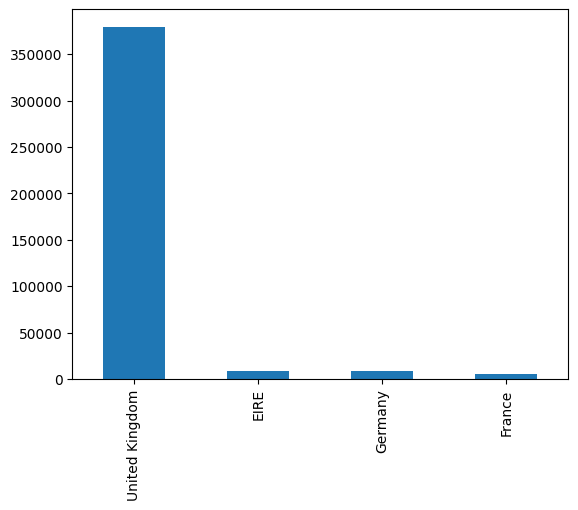

In [26]:
df2['Country'].value_counts().head(10).plot.bar()

In [27]:
(df2['Country'].value_counts() / df2.shape[0]) * 100 #percentage of customers from each country

United Kingdom    94.390182
EIRE               2.166904
Germany            2.022361
France             1.420553
Name: Country, dtype: float64

In [28]:
df2[df2['Quantity'] < 0].shape[0],df2[df2['Invoice Number'].str.contains('C')].shape[0]  #checking the number of rows where Quantity is negative and are related with invoice numbers containing 'C'

(9379, 9379)

In [29]:
df2 = df2[df2['Quantity'] > 0] #dropping the rows where Quantity is negative and retaining the rows where Quantity is positive

In [30]:
# regex_pattern_3 = r'\b[a-z]+\b'
# df2[df2['Item Description'].str.contains(regex_pattern_3, regex = True, case=True)].head()

In [31]:
df2[df2.duplicated(keep=False)].shape[0] #checking the duplicate rows

0

## RFM table creation

In [32]:
df2['total_price'] = df2['Quantity'] * df2['Unit Price'] #creating a new column for total price
df2.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Unit Price  Customer ID         Country purchase_date  \
0        12        6.95        13085  United Kingdom    2009-12-01   
1        12        6.75        13085  United Kingdom    2009-12-01   
2        12        6.75        13085  United Kingdom    2009-12-01   
3        48        2.10        13085  United Kingdom    2009-12-01   
4        24        1.25        13085  United Kingdom    2009-12-01   

   total_price  
0         83.4  
1         81.0  
2         81.0  
3        100.8  
4         30.0

In [33]:
monetary = df2.groupby('Customer ID')['total_price'].sum() #calculating the total price for each customer
monetary = monetary.reset_index()
monetary.columns = ['Customer ID', 'Amount']
monetary.head()

Customer ID   Amount
0        12346   169.36
1        12426   762.48
2        12427   303.50
3        12437  7731.99
4        12441   173.55

In [34]:
monetary.Amount.describe() #describing the total price column

count      4087.000000
mean       1986.597973
std        8260.460353
min           1.550000
25%         305.445000
50%         687.390000
75%        1697.975000
max      349164.350000
Name: Amount, dtype: float64

In [35]:
monetary[(monetary['Amount'] < 0) | (monetary['Amount'] == 0)].shape[0] #checking the number of rows where total price is zero or negative

0

In [36]:
frequency = df2.groupby('Customer ID')['Invoice Number'].nunique() #calculating the number of invoices for each customer
frequency = frequency.reset_index()
frequency.columns = ['Customer ID', 'Frequency']
frequency.head()

Customer ID  Frequency
0        12346          2
1        12426          1
2        12427          1
3        12437         21
4        12441          1

In [37]:
frequency['Frequency'].describe() #describing the Invoice Number column

count    4087.000000
mean        4.526792
std         8.275257
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Frequency, dtype: float64

In [38]:
print(df2['purchase_date'].max()) #checking the last purchase date
today = dt.datetime(2010,12,10) #creating a hypothetical day
today

2010-12-09 00:00:00


datetime.datetime(2010, 12, 10, 0, 0)

In [39]:
df2['time_delta'] = today- df2['purchase_date'] #calculating the recency of purchase for each row
df2.head()

Unnamed: 0 Invoice Number Item Code                     Item Description  \
0           0         489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1           1         489434    79323P                   PINK CHERRY LIGHTS   
2           2         489434    79323W                  WHITE CHERRY LIGHTS   
3           3         489434     22041         RECORD FRAME 7" SINGLE SIZE    
4           4         489434     21232       STRAWBERRY CERAMIC TRINKET BOX   

   Quantity  Unit Price  Customer ID         Country purchase_date  \
0        12        6.95        13085  United Kingdom    2009-12-01   
1        12        6.75        13085  United Kingdom    2009-12-01   
2        12        6.75        13085  United Kingdom    2009-12-01   
3        48        2.10        13085  United Kingdom    2009-12-01   
4        24        1.25        13085  United Kingdom    2009-12-01   

   total_price time_delta  
0         83.4   374 days  
1         81.0   374 days  
2         81.0   374 days  
3        100.8   374 days  
4         30.0   374 days

In [40]:
df2.time_delta.describe() #describing the time delta column

count                         392577
mean     162 days 13:10:12.741958890
std      113 days 14:21:56.236385452
min                  1 days 00:00:00
25%                 57 days 00:00:00
50%                155 days 00:00:00
75%                259 days 00:00:00
max                374 days 00:00:00
Name: time_delta, dtype: object

In [41]:
recency = df2.groupby('Customer ID')['time_delta'].min() #calculating the minimum time delta for each customer
recency = recency.reset_index()
recency.columns = ['Customer ID', 'Recency']
recency['Recency'] = recency['Recency'].dt.days #converting the time delta column to integer days
recency.head()

Customer ID  Recency
0        12346      165
1        12426      298
2        12427        7
3        12437       31
4        12441        2

In [42]:
recency.Recency.describe() #describing the time delta column

count    4087.000000
mean       90.675312
std        96.846178
min         1.000000
25%        18.000000
50%        52.000000
75%       136.000000
max       374.000000
Name: Recency, dtype: float64

In [43]:
amount_median = df2.groupby('Customer ID')['total_price'].median().reset_index() #calculating the median of total price for each customer
amount_median.columns = ['Customer ID', 'amount_median']
amount_median.head()

Customer ID  amount_median
0        12346           7.49
1        12426          15.00
2        12427          19.80
3        12437          17.20
4        12441          17.70

In [44]:
amount_median.amount_median.describe() #describing the median of total price column

count     4087.000000
mean        29.373811
std        193.070543
min          1.250000
25%          7.500000
50%         15.000000
75%         17.700000
max      10953.500000
Name: amount_median, dtype: float64

In [45]:
amount_invoice = df2.groupby(['Customer ID','Invoice Number'])['total_price'].sum().reset_index() #calculating the median of total price for each customer's invoice number
amount_invoice.head()

Customer ID Invoice Number  total_price
0        12346         499763        27.05
1        12346         513774       142.31
2        12426         497926       762.48
3        12427         536861       303.50
4        12437         489883       578.28

In [46]:
amount_median_invoice = amount_invoice.groupby('Customer ID')['total_price'].median().reset_index() #calculating the median of totals of invoices for each customer
amount_median_invoice.columns = ['Customer ID', 'amount_median_invoice']

In [47]:
amount_median_invoice.describe() #describing the median of totals of invoices column

Customer ID  amount_median_invoice
count   4087.000000            4087.000000
mean   15479.601419             343.897397
std     1631.779431             427.771323
min    12346.000000               1.550000
25%    14080.500000             170.415000
50%    15494.000000             278.585000
75%    16904.500000             390.850000
max    18287.000000           11880.840000

In [48]:
amount_mean = df2.groupby('Customer ID')['total_price'].mean().reset_index() #calculating the mean of total price for each customer regardless of invoices
amount_mean.columns = ['Customer ID', 'amount_mean']

In [49]:
RFM = frequency.merge(monetary, on = "Customer ID")
RFM = RFM.merge(recency, on = "Customer ID")
RFM = RFM.merge(amount_median_invoice, on = "Customer ID")
RFM = RFM.merge(amount_mean, on = "Customer ID")
RFM['amount_mean_invoice'] = RFM['Amount'] / RFM['Frequency'] #calculating the mean amount invoices for each customer
RFM = RFM.merge(amount_median, on = "Customer ID")
RFM.describe()

Customer ID    Frequency         Amount      Recency  \
count   4087.000000  4087.000000    4087.000000  4087.000000   
mean   15479.601419     4.526792    1986.597973    90.675312   
std     1631.779431     8.275257    8260.460353    96.846178   
min    12346.000000     1.000000       1.550000     1.000000   
25%    14080.500000     1.000000     305.445000    18.000000   
50%    15494.000000     2.000000     687.390000    52.000000   
75%    16904.500000     5.000000    1697.975000   136.000000   
max    18287.000000   205.000000  349164.350000   374.000000   

       amount_median_invoice   amount_mean  amount_mean_invoice  amount_median  
count            4087.000000   4087.000000          4087.000000    4087.000000  
mean              343.897397     34.962425           360.241638      29.373811  
std               427.771323    194.879243           454.108361     193.070543  
min                 1.550000      1.550000             1.550000       1.250000  
25%               170.415000     10.704817           178.905000       7.500000  
50%               278.585000     17.086509           281.050000      15.000000  
75%               390.850000     24.366035           412.120000      17.700000  
max             11880.840000  10953.500000         11880.840000   10953.500000

## EDA of RFM KPI's

In [50]:
RFM.dtypes

Customer ID                int64
Frequency                  int64
Amount                   float64
Recency                    int64
amount_median_invoice    float64
amount_mean              float64
amount_mean_invoice      float64
amount_median            float64
dtype: object

### Checking for the nature of each variable with histograms and boxplots

In [51]:
fig = px.histogram(RFM, x="Amount", nbins=4000, title='Histogram Total for each customer')
fig.show()

In [52]:
fig = px.box(RFM, x = [ 'Amount'],orientation = 'h', title='Boxplot Total for each customer')
fig.show()

In [53]:
fig = px.histogram(RFM, x="amount_mean", nbins=4000, title='Histogram Mean Amount for each customer independent of number of invoices')
fig.show()

In [54]:
fig = px.box(RFM, x = [ 'amount_mean'], orientation = 'h',title='Boxplot Mean Amount for each customer independent of number of invoices')
fig.show()

In [130]:
fig = px.histogram(RFM, x="amount_median", nbins=4000, title='Histogram Median Amount for each customer independent of number of invoices')
fig.show()

In [131]:
fig = px.box(RFM, x = [ 'amount_median'], orientation = 'h', title='Boxplot Median Amount for each customer independent of number of invoices')
fig.show()

In [57]:
fig = px.histogram(RFM, x="amount_mean_invoice", nbins=4000, title='Histogram Invoice totals Means for each customer')
fig.show()

In [58]:
fig = px.box(RFM, x = [ 'amount_mean_invoice'] , orientation = 'h', title='Boxplot Invoice totals Means for each customer')
fig.show()

In [59]:
fig = px.histogram(RFM, x="amount_median_invoice", nbins=4000, title='Histogram Invoice totals Medians for each customer')
fig.show()

In [60]:
fig = px.box(RFM, x = [ 'amount_median_invoice'], orientation = 'h',title='Boxplot Invoice totals Medians for each customer')
fig.show()

In [61]:
fig = px.histogram(RFM, x="Recency", nbins=300, title='Histogram Recency for each customer')
fig.show()

In [62]:
fig = px.box(RFM, x = [ 'Recency'], title='Boxplot Recency for each customer')
fig.show() 

In [63]:
fig = px.histogram(RFM, x="Frequency", nbins=1000, title='Histogram Frequency for each customer')
fig.show()

In [64]:
fig = px.box(RFM, x = [ 'Frequency'], title='Boxplot Frequency for each customer')
fig.show() 

### AS we have seen in the boplot of the Recency the customers having recency more than 350 are outliers and can be excluded from the analysis

 4. Customer Segmentation

   Utilize the RFM metrics to segment customers into distinct groups based on their purchasing behavior. Group customers into categories such as high-value, low-value, loyal, dormant, etc.

 

5. Insights and Interpretation

   Analyze the results of customer segmentation to uncover meaningful insights. Identify patterns and trends within each customer group and understand their preferences and behaviors.

 

6. Marketing Strategies

   Based on the RFM analysis, devise tailored marketing strategies for each customer segment. Craft targeted campaigns to improve customer retention, re-engage dormant customers, and incentivize high-value customers.

 

7. Reporting and Presentation

   Prepare a comprehensive report detailing the RFM analysis, customer segmentation, and insights. Create a visually engaging presentation to communicate the findings effectively to stakeholders and decision-makers. 

In [65]:
RFM_2 = RFM[RFM['Recency'] < 350]

In [66]:
RFM_2.reset_index(drop=True, inplace=True) #resetting the index and dropping the old index
RFM_2.tail()

Customer ID  Frequency   Amount  Recency  amount_median_invoice  \
3974        18283          6   641.77       18                105.035   
3975        18284          1   461.68       67                461.680   
3976        18285          1   427.00      296                427.000   
3977        18286          2  1296.43      112                648.215   
3978        18287          4  2345.71       18                621.750   

      amount_mean  amount_mean_invoice  amount_median  
3974     2.790304           106.961667           1.95  
3975    16.488571           461.680000          15.00  
3976    35.583333           427.000000          17.85  
3977    19.349701           648.215000          17.70  
3978    27.596588           586.427500          17.70

In [67]:
RFM_2.describe()

Customer ID    Frequency         Amount      Recency  \
count   3979.000000  3979.000000    3979.000000  3979.000000   
mean   15475.088464     4.619251    2032.988581    83.210606   
std     1633.346832     8.367294    8366.876818    86.740132   
min    12346.000000     1.000000       1.550000     1.000000   
25%    14073.000000     1.000000     312.650000    17.500000   
50%    15486.000000     3.000000     721.060000    50.000000   
75%    16897.000000     5.000000    1745.985000   122.000000   
max    18287.000000   205.000000  349164.350000   339.000000   

       amount_median_invoice   amount_mean  amount_mean_invoice  amount_median  
count            3979.000000   3979.000000          3979.000000    3979.000000  
mean              346.631406     35.312505           363.441500      29.650243  
std               432.417764    197.443904           459.058056     195.615682  
min                 1.550000      1.550000             1.550000       1.250000  
25%               172.012500     10.717783           181.536984       7.500000  
50%               280.355000     17.108966           283.430000      15.000000  
75%               393.660000     24.366035           415.186000      17.700000  
max             11880.840000  10953.500000         11880.840000   10953.500000

In [68]:
from sklearn.preprocessing import normalize, StandardScaler
standard_scaler = StandardScaler()
RFM_2_std = standard_scaler.fit_transform(RFM_2.drop(['Customer ID'], axis=1))
RFM_2_std = pd.concat([RFM_2['Customer ID'],pd.DataFrame(data = RFM_2_std, columns=RFM_2.columns[1:])], axis= 1) #standardizing the data and converting it to dataframe, giving column names as original dataframe
# RFM_2_std['Customer ID'] = RFM_2['Customer ID'] #adding the CustomerID column to the standardized dataframe
RFM_2_std.head()

Customer ID  Frequency    Amount   Recency  amount_median_invoice  \
0        12346  -0.313074 -0.222767  0.943043              -0.605859   
1        12426  -0.432602 -0.151869  2.476551               0.961803   
2        12427  -0.432602 -0.206733 -0.878719              -0.099757   
3        12437   1.957958  0.681224 -0.601995              -0.181147   
4        12441  -0.432602 -0.222266 -0.936369              -0.400315   

   amount_mean  amount_mean_invoice  amount_median  
0    -0.143126            -0.607323      -0.113299  
1    -0.096695             0.869364      -0.074902  
2    -0.025137            -0.130591      -0.050361  
3    -0.071274             0.010345      -0.063654  
4    -0.098953            -0.413707      -0.061098

In [69]:
RFM_2_std.shape

(3979, 8)

In [70]:
fig = px.scatter(RFM_2_std, x='Frequency', y='Recency',color='Recency', title='Scatterplot Frequency vs Recency')

fig.show()

## From the Graph above we can see that the High Frequency customers are not retained over the time.

In [71]:
fig = px.scatter(RFM_2_std, x='Frequency', y='amount_mean_invoice', color='Recency', title='Scatter Plot Frequency vs Mean Invoice Amount')
fig.show()

## As from the graph above, we see that the High frequency customers are spending only low to moderate amounts of money

In [72]:
# fig = px.scatter(RFM_2_std, x='Recency', y='amount_mean_invoice', title='Recency vs Mean Invoice Total')
# fig.show()

## Clustering attempt

In [73]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rfm_cluster = RFM_2_std.loc[:, RFM_2_std.columns.isin(['Recency', 'Frequency', 'amount_mean_invoice'])]
# lets check the optimal number of clusters uing silhouette score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(rfm_cluster)
    

    score = silhouette_score (rfm_cluster, preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49794664944967115)
For n_clusters = 3, silhouette score is 0.5299594863537421)
For n_clusters = 4, silhouette score is 0.5251601291450835)
For n_clusters = 5, silhouette score is 0.5319927607089086)
For n_clusters = 6, silhouette score is 0.521409901179755)
For n_clusters = 7, silhouette score is 0.4312588539389116)
For n_clusters = 8, silhouette score is 0.3955161965307274)
For n_clusters = 9, silhouette score is 0.3979148621080638)
For n_clusters = 10, silhouette score is 0.38668521850092674)
For n_clusters = 11, silhouette score is 0.32701290258900767)
For n_clusters = 12, silhouette score is 0.3345336969577317)
For n_clusters = 13, silhouette score is 0.3306911509353936)
For n_clusters = 14, silhouette score is 0.33081544963267506)


1 : 11936.999999999996
2 : 8630.178638413441
3 : 6404.6839042059455
4 : 4614.229452627409
5 : 3681.3399164241055
6 : 2877.0809644184947
7 : 2484.982981142896
8 : 2117.6163584082174
9 : 1806.876814128771


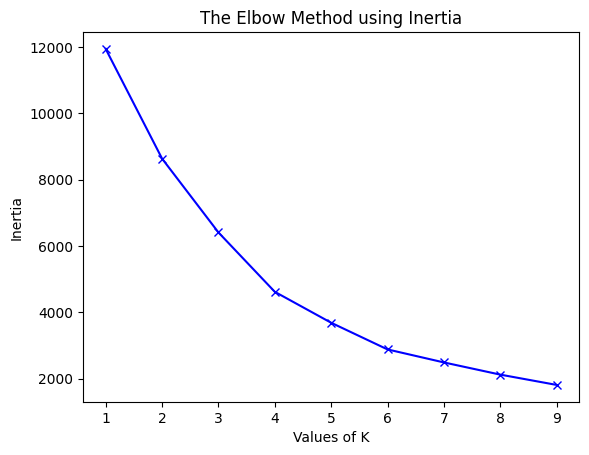

In [74]:
# lets check the optimal number of clusters uing elbow method
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(rfm_cluster) 
    kmeanModel.fit(rfm_cluster)     
      
    distortions.append(sum(np.min(cdist(rfm_cluster, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rfm_cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rfm_cluster, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rfm_cluster.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()  

In [75]:
rfm_cluster.shape

(3979, 3)

### Looks like 4-6 is the optimum number of clusters, as elbow's slope is suddenly stopped near 4 and 6, lets try clustering

In [76]:
model4 = KMeans(n_clusters = 4)

model4 = model4.fit(rfm_cluster)

np.unique(model4.labels_)

RFM_kmeans_4 = rfm_cluster.copy()

RFM_kmeans_4['kmeans'] = KMeans(n_clusters=4).fit_predict(rfm_cluster)


fig = px.scatter_3d(RFM_kmeans_4, x='Frequency', y='amount_mean_invoice', z='Recency',
              color= 'kmeans')
fig.show()

In [77]:
model6 = KMeans(n_clusters = 6)

model6 = model6.fit(rfm_cluster)

np.unique(model6.labels_)

RFM_kmeans_6 = rfm_cluster.copy()

RFM_kmeans_6['kmeans'] = KMeans(n_clusters=6, init='k-means++').fit_predict(rfm_cluster)


fig = px.scatter_3d(RFM_kmeans_6, x='Frequency', y='amount_mean_invoice', z='Recency',
              color= 'kmeans')
fig.show()

In [78]:
RFM_kmeans_6 = pd.concat([RFM_2['Customer ID'],RFM_kmeans_6], axis= 1)
RFM_kmeans_6.head()

Customer ID  Frequency   Recency  amount_mean_invoice  kmeans
0        12346  -0.313074  0.943043            -0.607323       1
1        12426  -0.432602  2.476551             0.869364       1
2        12427  -0.432602 -0.878719            -0.130591       0
3        12437   1.957958 -0.601995             0.010345       4
4        12441  -0.432602 -0.936369            -0.413707       0

In [87]:
# We assign different labels to each cluster
# 4: Losing, beacuse they have low recency and low monetary score and once they were frequent customers
# 5: Need_to_engage, because their spendings are good but they are not that frequent and their recnecy is mid range
# 0: Low_value, because they are not frequent and their spendings are low and recency is upto mid range
# 1: Recent_joiners, because their reccency is high and they are not frequent and their spendings are low
# 2: Lost, because they were frequent and now they are not existent since recency is low
# 3: Rare_big_players, They have extravagant spendings even though they are not frequent and their recency is spread across the range.
RFM_kmeans_6['cluster'] = RFM_kmeans_6['kmeans'].map({0:'Low_Value',1:'Recent_joiners',  2:'Lost',  3:'Rare_big_players', 4:'Losing',5:'Need_to_engage'})
RFM_kmeans_6.head()

Customer ID  Frequency   Recency  amount_mean_invoice  kmeans  \
0        12346  -0.313074  0.943043            -0.607323       1   
1        12426  -0.432602  2.476551             0.869364       1   
2        12427  -0.432602 -0.878719            -0.130591       0   
3        12437   1.957958 -0.601995             0.010345       4   
4        12441  -0.432602 -0.936369            -0.413707       0   

          cluster  
0  Recent_joiners  
1  Recent_joiners  
2       Low_Value  
3          Losing  
4       Low_Value

In [109]:
RFM_kmeans_6['cluster'].value_counts()

Low_Value           2669
Recent_joiners       901
Losing               259
Need_to_engage       133
Lost                  13
Rare_big_players       4
Name: cluster, dtype: int64

## Clusters using total spent amoount instead of amount (mean invoice)

In [116]:
rfm_cluster_2 = RFM_2_std.loc[:, RFM_2_std.columns.isin(['Recency', 'Frequency', 'Amount'])]
# lets check the optimal number of clusters uing silhouette score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(rfm_cluster_2)
    

    score = silhouette_score (rfm_cluster_2, preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9186329869175293)
For n_clusters = 3, silhouette score is 0.5887813634477289)
For n_clusters = 4, silhouette score is 0.6095941447476713)
For n_clusters = 5, silhouette score is 0.5868270122319063)
For n_clusters = 6, silhouette score is 0.5156979311822015)
For n_clusters = 7, silhouette score is 0.5040305567446072)
For n_clusters = 8, silhouette score is 0.4843233877179994)
For n_clusters = 9, silhouette score is 0.4334038306379753)
For n_clusters = 10, silhouette score is 0.4182800881271249)
For n_clusters = 11, silhouette score is 0.41753876655778843)
For n_clusters = 12, silhouette score is 0.4186069390973933)
For n_clusters = 13, silhouette score is 0.39921792141532514)
For n_clusters = 14, silhouette score is 0.40298046513375757)


1 : 11937.0
2 : 8186.400546402879
3 : 4881.234099245092
4 : 3420.96201025309
5 : 2649.1554189833396
6 : 2170.8656775302366
7 : 1798.125720809479
8 : 1430.674971931057
9 : 1252.5092411621729


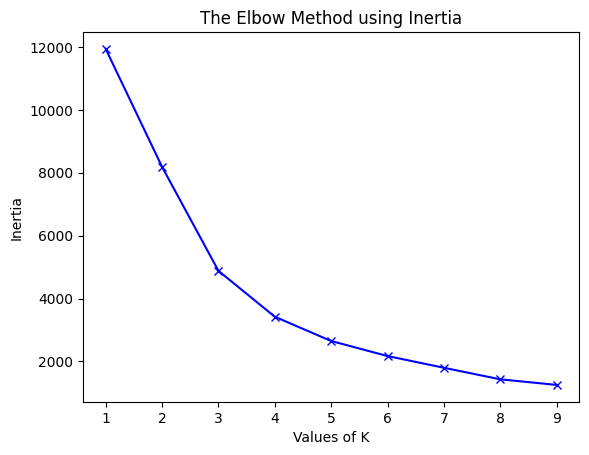

In [117]:
# lets check the optimal number of clusters uing elbow method
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(rfm_cluster_2) 
    kmeanModel.fit(rfm_cluster_2)     
      
    distortions.append(sum(np.min(cdist(rfm_cluster_2, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rfm_cluster_2.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rfm_cluster_2, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rfm_cluster_2.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()  

### From the elbow method we can see that 4 clusters are optimum, silhouette score method is saying 2  only clusters 

In [118]:
model4_2 = KMeans(n_clusters = 4)

model4_2 = model4_2.fit(rfm_cluster_2)

np.unique(model4_2.labels_)

RFM_kmeans_4_2 = rfm_cluster_2.copy()

RFM_kmeans_4_2['kmeans'] = KMeans(n_clusters=4, init='k-means++').fit_predict(rfm_cluster_2)


fig = px.scatter_3d(RFM_kmeans_4_2, x='Frequency', y='Amount', z='Recency',
              color= 'kmeans')
fig.show()

## We see that using total spent gives less number of clusters, and less meaningful clusters

## Lets try to manually divide customers into categories according to their RFM scores

In [80]:
RFM_2["RecencyScore"] = pd.qcut(RFM_2["Recency"], 8, labels = [8,7,6,5,4,3,2,1]) # Creating Recency Score
RFM_2["FrequencyScore"]= pd.qcut(RFM_2["Frequency"].rank(method="first"),8, labels=[1,2,3,4,5,6,7,8]) # Creating Frequency Score
RFM_2["AmountScore"]= pd.qcut(RFM_2["amount_mean_invoice"],8, labels=[1,2,3,4,5,6,7,8]) # Creating Amount Score
RFM_2["Total_spent_score"] = pd.qcut(RFM_2["Amount"],8, labels=[1,2,3,4,5,6,7,8]) # Creating Total Spent Score

In [81]:
fig = px.histogram(RFM_2, x="Frequency", nbins=1000, title='Histogram Frequency for each customer')
fig.show()

In [82]:
RFM_2.head()

Customer ID  Frequency   Amount  Recency  amount_median_invoice  \
0        12346          2   169.36      165                  84.68   
1        12426          1   762.48      298                 762.48   
2        12427          1   303.50        7                 303.50   
3        12437         21  7731.99       31                 268.31   
4        12441          1   173.55        2                 173.55   

   amount_mean  amount_mean_invoice  amount_median RecencyScore  \
0     7.056667                84.68           7.49            2   
1    16.222979               762.48          15.00            1   
2    30.350000               303.50          19.80            8   
3    21.241731               368.19          17.20            5   
4    15.777273               173.55          17.70            8   

  FrequencyScore AmountScore  
0              3           1  
1              1           8  
2              1           5  
3              8           6  
4              1           2

In [120]:
#there are lot of duplicates in Frequency so we devised a new method to calculate the frequency score
bin_edges = [0, 3, 7, 13, 25, 40, 50, 70, float('inf')]
bin_labels = [1, 2, 3, 4, 5, 6, 7, 8]
RFM_2['FrequencyScore_2'] = pd.cut(RFM_2['Frequency'], bins=bin_edges, labels=bin_labels, include_lowest=True)
RFM_2.head()

Customer ID  Frequency   Amount  Recency  amount_median_invoice  \
0        12346          2   169.36      165                  84.68   
1        12426          1   762.48      298                 762.48   
2        12427          1   303.50        7                 303.50   
3        12437         21  7731.99       31                 268.31   
4        12441          1   173.55        2                 173.55   

   amount_mean  amount_mean_invoice  amount_median  RecencyScore  \
0     7.056667                84.68           7.49             2   
1    16.222979               762.48          15.00             1   
2    30.350000               303.50          19.80             8   
3    21.241731               368.19          17.20             5   
4    15.777273               173.55          17.70             8   

   FrequencyScore  AmountScore FrequencyScore_2    Segment Total_spent_score  
0               3            1                1  Low_Value                 1  
1               1            8                1     Normal                 5  
2               1            5                1     Normal                 2  
3               8            6                4     Normal                 8  
4               1            2                1     Normal                 1

In [121]:
RFM_2['FrequencyScore_2'].value_counts()

1    2475
2     921
3     383
4     139
5      34
8      12
6      10
7       5
Name: FrequencyScore_2, dtype: int64

## Dividing customers into categories based on the combination of scores

In [84]:
RFM_2['RecencyScore'] = RFM_2['RecencyScore'].astype('int64')
RFM_2['FrequencyScore'] = RFM_2['FrequencyScore'].astype('int64')
RFM_2['AmountScore'] = RFM_2['AmountScore'].astype('int64')
RFM_2['FrequencyScore_2'] = RFM_2['FrequencyScore_2'].astype('int64')
RFM_2['Total_spent_score'] = RFM_2['Total_spent_score'].astype('int64')
RFM_2.head()

Customer ID  Frequency   Amount  Recency  amount_median_invoice  \
0        12346          2   169.36      165                  84.68   
1        12426          1   762.48      298                 762.48   
2        12427          1   303.50        7                 303.50   
3        12437         21  7731.99       31                 268.31   
4        12441          1   173.55        2                 173.55   

   amount_mean  amount_mean_invoice  amount_median  RecencyScore  \
0     7.056667                84.68           7.49             2   
1    16.222979               762.48          15.00             1   
2    30.350000               303.50          19.80             8   
3    21.241731               368.19          17.20             5   
4    15.777273               173.55          17.70             8   

   FrequencyScore  AmountScore  FrequencyScore_2  
0               3            1                 1  
1               1            8                 1  
2               1            5                 1  
3               8            6                 4  
4               1            2                 1

In [112]:
def assign_segment(recency, frequency, monetary):
    if recency >=6 and frequency >=5 and monetary >=5:
        if recency >=7 and frequency >=6 and monetary >=6:
            return 'High_Value'
        return 'Loyal'
    elif recency <=3 and frequency <=3 and monetary <=3:
        if recency <=2 and frequency <=2 and monetary <= 2:
            return 'Low_Value'
        return 'Dormant'
    elif recency >=6 and frequency in range(3,5+1) and monetary <=4:
        return 'Almost_New'
    elif recency <=3 and frequency in range(1,3+1) and monetary in range(4,7+1):
        return 'Potential_Loyalist'
    else:
        return 'Normal'
    
        

# Apply the segmentation function to create a 'Segment' column
RFM_2['Segment'] = RFM_2.apply(lambda row: assign_segment(row['RecencyScore'], row['FrequencyScore_2'], row['AmountScore']), axis=1)
# RFM_2[RFM_2['RecencyScore'] == 2]['Recency'].min()


In [113]:
RFM_2['Segment'].value_counts()

Normal                2561
Potential_Loyalist     644
Low_Value              367
Dormant                312
Almost_New              60
High_Value              22
Loyal                   13
Name: Segment, dtype: int64

In [ ]:
RMF_2_new = RFM_2.copy()

In [128]:
def assign_segment2(recency, frequency, monetary):
    if recency >=6 and frequency >=5 and monetary >=6:
        if recency >=7 and frequency >=6 and monetary >=6:
            return 'High_Value'
        return 'Loyal'
    elif recency <=3 and frequency <=3 and monetary <=3:
        if recency <=2 and frequency <=2 and monetary <= 2:
            return 'Low_Value'
        return 'Dormant'
    elif recency >=6 and frequency in range(2,5+1) and monetary <=5:
        return 'Almost_New'
    elif recency <=3 and frequency in range(1,3+1) and monetary in range(4,7+1):
        return 'Potential_Loyalist'
    else:
        return 'Normal'
    
        
# Apply the segmentation function to create a 'Segment' column
RMF_2_new['Segment'] = RMF_2_new.apply(lambda row: assign_segment2(row['RecencyScore'], row['FrequencyScore_2'], row['Total_spent_score']), axis=1)

In [129]:
RMF_2_new['Segment'].value_counts()

Normal                2347
Potential_Loyalist     592
Low_Value              479
Dormant                365
Almost_New             138
Loyal                   33
High_Value              25
Name: Segment, dtype: int64

### We should provide the potential loyalists with the best offers to retain them, 

### We should provide the New customers recommendations by which we can increase their interaction with the store

### It would be great if dormant and low value customers can be sent personalized emails and surveys to understand their needs and encourage them to shop 

### We can high value and loyal customers Rewards and suggest them to refer their friends and family to the store

